In [1]:
import sys

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
indir='/home/hsher/scratch/ABC_2rep/beta-mixture_CC/homer/finemapped_results/COV'



In [2]:
folders = os.listdir(indir)

In [3]:
libs = [f.split('.')[0] for f in folders]
rbps = [f.split('.')[1] for f in folders]

In [4]:
set(libs)

{'HEK293_rep1',
 'HEK293_rep2',
 'K562_rep4',
 'K562_rep6',
 'motifFindingParameters'}

In [5]:

def homer_reader(fname):
    ''' read homer files into a dataframes
    fmame: .homore file
    '''
    with open(fname) as f:
        flines = f.readlines()
        all_matrix = []
        all_fields = []
        motif_no = 0
        for line in flines:
            if line[0] == '>':
                if motif_no > 0:
                    all_matrix.append(pd.DataFrame(matrix_lines, columns= ['A', 'C', 'G', 'T']))
                    all_fields.append(fields)
                matrix_lines = []
                fields = dict(zip(['log odds', 'log pval'], [float(l) for l in line.split('\t')[2:4]]))
                motif_no += 1
            else:
                # matrix
                
                matrix_lines.append([float(l) for l in line.split('\t')])
    return all_matrix, all_fields
                
def plot_motif(df, label = '%', ax = None, title = '', **kwargs):
    ''' df: index:[ATCG], col: integer pos '''
    import logomaker
    # top 20
    df.columns = np.arange(df.shape[1])
    ww_logo = logomaker.Logo(df.T,
                            vpad=.1,
                            width=.8,
                            ax = ax, 
                            **kwargs)
    ww_logo.ax.set_ylabel(label)
    ax.set_title(title)
    
    

In [6]:
rc = {"axes.spines.left" : False,
      "axes.spines.right" : False,
      "axes.spines.bottom" : False,
      "axes.spines.top" : False,
      "xtick.bottom" : False,
      "xtick.labelbottom" : False,
      "ytick.labelleft" : False,
      "ytick.left" : False}
plt.rcParams.update(rc)
def get_strongest_motif(filename, lib, rbp):
    motifs,attributes = homer_reader(filename)
                
    # sort motif by l2 odds
    strongest_motif = [(m, a) for m, a in sorted(zip(motifs, attributes), key=lambda pair: pair[1]['log pval'], reverse = False)][0]
    ma = strongest_motif[0]
    attr = strongest_motif[1]


    ma.rename({'T':'U'}, inplace = True, axis = 1)
    

    #title = f'{reg},{rbp}\n{pv:1f}'

    pv = attr['log pval']
    odds = attr['log odds']
    seq = ''.join(ma.idxmax(axis = 1).tolist())
    
    
    return ma, [lib, rbp, seq, pv, odds]
def plot_all_homer(libs, rbps, indir = indir):
    stats = []
    f, ax = plt.subplots(len(rbps), len(libs), figsize = (len(libs)*2,len(rbps)))
    for j, lib in enumerate(libs):
        for i, rbp in enumerate(rbps):
            filename = os.path.join(indir, 
                                  f'{lib}.{rbp}', 
                                  'homerMotifs.all.motifs')
            
            ax[i,j].tick_params(axis=u'both', which=u'both',length=0)
            
            try:
                ma, s = get_strongest_motif(filename, lib, rbp)
                plot_motif(ma.T, ax = ax[i,j])
                stats.append(s)
            except Exception as e:
                print(e, filename)
            if j == 0:
                ax[i,j].set_ylabel(rbp)
            if i == len(rbps)-1:
                ax[i,j].set_xlabel(lib)
    
    return f, pd.DataFrame(stats, columns = ['lib','rbp', 'seq', 'log p-value', 'log odds'])

In [7]:
lib = 'K562_rep4'
rbp = 'PUM2'
motifs, attributes = homer_reader(os.path.join(indir, f'{lib}.{rbp}', 'homerMotifs.all.motifs'))

[Errno 2] No such file or directory: '/home/hsher/scratch/ABC_2rep/beta-mixture_CC/homer/finemapped_results/COV/HEK293_rep1.txt/homerMotifs.all.motifs' /home/hsher/scratch/ABC_2rep/beta-mixture_CC/homer/finemapped_results/COV/HEK293_rep1.txt/homerMotifs.all.motifs
[Errno 2] No such file or directory: '/home/hsher/scratch/ABC_2rep/beta-mixture_CC/homer/finemapped_results/COV/HEK293_rep2.txt/homerMotifs.all.motifs' /home/hsher/scratch/ABC_2rep/beta-mixture_CC/homer/finemapped_results/COV/HEK293_rep2.txt/homerMotifs.all.motifs
[Errno 2] No such file or directory: '/home/hsher/scratch/ABC_2rep/beta-mixture_CC/homer/finemapped_results/COV/K562_rep4.txt/homerMotifs.all.motifs' /home/hsher/scratch/ABC_2rep/beta-mixture_CC/homer/finemapped_results/COV/K562_rep4.txt/homerMotifs.all.motifs
[Errno 2] No such file or directory: '/home/hsher/scratch/ABC_2rep/beta-mixture_CC/homer/finemapped_results/COV/K562_rep6.txt/homerMotifs.all.motifs' /home/hsher/scratch/ABC_2rep/beta-mixture_CC/homer/finemapp

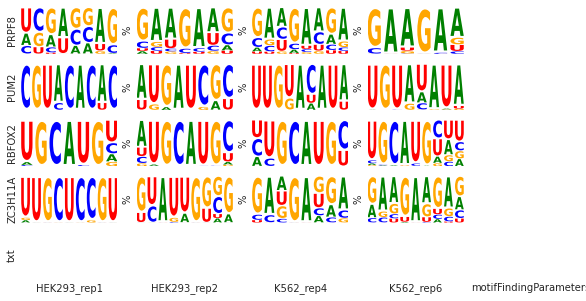

In [9]:
from plot_params import *
f = plot_all_homer(sorted(list(set(libs))), sorted(list(set(rbps))))
plt.savefig(figdir/'Beta_all_motif.pdf')

[Errno 2] No such file or directory: '/home/hsher/scratch/ABC_2rep/DMM/homer/finemapped_results/CITS/HEK293_rep1.txt/homerMotifs.all.motifs' /home/hsher/scratch/ABC_2rep/DMM/homer/finemapped_results/CITS/HEK293_rep1.txt/homerMotifs.all.motifs
[Errno 2] No such file or directory: '/home/hsher/scratch/ABC_2rep/DMM/homer/finemapped_results/CITS/HEK293_rep2.txt/homerMotifs.all.motifs' /home/hsher/scratch/ABC_2rep/DMM/homer/finemapped_results/CITS/HEK293_rep2.txt/homerMotifs.all.motifs
[Errno 2] No such file or directory: '/home/hsher/scratch/ABC_2rep/DMM/homer/finemapped_results/CITS/K562_rep4.txt/homerMotifs.all.motifs' /home/hsher/scratch/ABC_2rep/DMM/homer/finemapped_results/CITS/K562_rep4.txt/homerMotifs.all.motifs
[Errno 2] No such file or directory: '/home/hsher/scratch/ABC_2rep/DMM/homer/finemapped_results/CITS/K562_rep6.txt/homerMotifs.all.motifs' /home/hsher/scratch/ABC_2rep/DMM/homer/finemapped_results/CITS/K562_rep6.txt/homerMotifs.all.motifs
[Errno 2] No such file or directory:

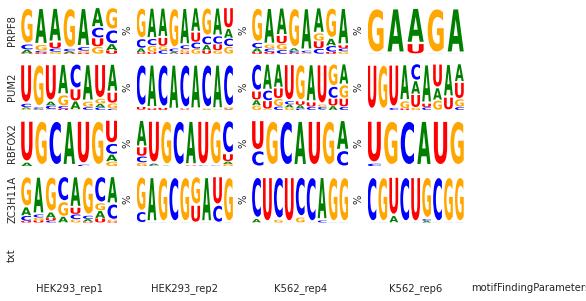

In [12]:
f = plot_all_homer(sorted(list(set(libs))), sorted(list(set(rbps))),
                  indir= '/home/hsher/scratch/ABC_2rep/DMM/homer/finemapped_results/CITS')
plt.savefig(figdir/'DMM_all_motif.pdf')

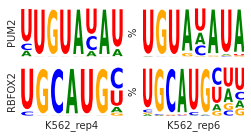

In [14]:
f, beta_stat = plot_all_homer(['K562_rep4','K562_rep6'], ['PUM2', 'RBFOX2'],
                             indir= '/home/hsher/scratch/ABC_2rep/beta-mixture_CC/homer/finemapped_results/CITS')
plt.savefig(figdir/'Beta_rep6_motif.pdf')

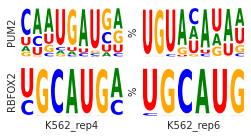

In [15]:
f, beta_stat = plot_all_homer(['K562_rep4','K562_rep6'], ['PUM2', 'RBFOX2'],
                             indir= '/home/hsher/scratch/ABC_2rep/DMM/homer/finemapped_results/CITS')
plt.savefig(figdir/'DMM_rep6_motif.pdf')

In [16]:
# eclip homers are here
eclip_homer = Path('/projects/ps-yeolab3/eboyle/encode/pipeline/05_20220720/20220728_encode3/k562/output/homer/finemapped_results/')
ma_pum2, stat_pum2 = get_strongest_motif(eclip_homer / 'PUM2_K562' / 'homerMotifs.all.motifs', 'eclip', 'PUM2')
ma_rbfox2, stat_rbfox2 = get_strongest_motif(eclip_homer / 'RBFOX2_K562' / 'homerMotifs.all.motifs', 'eclip', 'RBFOX2')

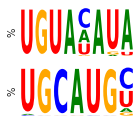

In [17]:
f, ax = plt.subplots(2,1, figsize = (2,2))

plot_motif(ma_pum2.T, ax = ax[0])
plot_motif(ma_rbfox2.T, ax = ax[1])
plt.savefig(figdir/'eCLIP_motif.pdf')

In [18]:
eclip_stats = pd.DataFrame([stat_rbfox2, stat_pum2], columns = ['lib','rbp', 'seq', 'log p-value', 'log odds'])

In [19]:
eclip_stats

,lib,rbp,seq,log p-value,log odds
0,eclip,RBFOX2,UGCAUGC,-3723.001161,4.476452
1,eclip,PUM2,UGUACAUA,-6322.328071,4.996388


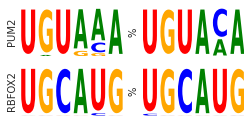

In [20]:
import seaborn as sns
stats = []
indir = Path('/projects/ps-yeolab5/hsher/motif/')
all_data = pd.read_csv('../all_data.csv')
uids = [u for u in all_data['uid'] if 'multiplex' in u and 'ENCODE' not in u and 'K562' in u]
all_data = all_data.loc[all_data['uid'].isin(uids)]
all_data['RBP'] = all_data['uid'].str.split('_', expand = True)[4]
all_data['rep'] = all_data['uid'].str.split('_', expand = True)[3]
all_data['rep'].unique()

f, axes = plt.subplots(2,2, figsize = (4,2))
for j,rep in enumerate(['rep4', 'rep6']):
    for i, rbp in enumerate(['PUM2', 'RBFOX2']):
        uid = all_data.loc[(all_data['rep']==rep)&(all_data['RBP']==rbp), 'uid'].values[0]
        try:
            homer_folder = f'Dan_multiplex1_K562_{rep}_{rbp}.peaks.normed.compressed.filtered.annotate.homer'
            bed_folder = f'Dan_multiplex1_K562_{rep}_{rbp}.peaks.normed.compressed.filtered.bed'
            homer_file_loc = indir / f'Dan_multiplex1_K562_{rep}' / homer_folder/ 'homer' / bed_folder / 'all' / 'homerMotifs.all.motifs'
            
            ma, s = get_strongest_motif(homer_file_loc, 'K562_'+rep, rbp)
            plot_motif(ma.T, ax = axes[i,j])
            stats.append(s)

                
        except Exception as e:
            print(e)
        if j == 0:
            axes[i,j].set_ylabel(rbp, rotation = 90)
        if i == 0:
            pass
        axes[i,j].get_xaxis().set_visible(False)
sns.despine(f, top = True, bottom = True, left = True, right = True)
plt.savefig(figdir/'CLIPper_rep6_motif.pdf')

clipper_stats = pd.DataFrame(stats, columns = ['lib','rbp', 'seq', 'log p-value', 'log odds'])

In [21]:
clipper_stats['method'] = 'CLIPper'
beta_stat['method'] = 'beta-binom mixture'
eclip_stats['method'] = 'skipper'

In [22]:
all_stats = pd.concat([clipper_stats, beta_stat, eclip_stats]).sort_values(by = 'rbp')

In [23]:
print(all_stats.to_latex())

\begin{tabular}{llllrrl}
\toprule
{} &        lib &     rbp &        seq &  log p-value &  log odds &              method \\
\midrule
0 &  K562\_rep4 &    PUM2 &     UGUAAA &   -16.392750 &  5.791400 &             CLIPper \\
2 &  K562\_rep6 &    PUM2 &     UGUACA &   -55.578897 &  7.294885 &             CLIPper \\
0 &  K562\_rep4 &    PUM2 &  CAAUGAUGA &   -62.524940 &  6.586842 &  beta-binom mixture \\
2 &  K562\_rep6 &    PUM2 &  UGUACAUAA &  -212.141310 &  7.163347 &  beta-binom mixture \\
1 &      eclip &    PUM2 &   UGUACAUA & -6322.328071 &  4.996388 &             skipper \\
1 &  K562\_rep4 &  RBFOX2 &     UGCAUG &  -693.372340 &  5.438039 &             CLIPper \\
3 &  K562\_rep6 &  RBFOX2 &     UGCAUG & -1623.941983 &  5.132657 &             CLIPper \\
1 &  K562\_rep4 &  RBFOX2 &    UGCAUGA & -1079.632538 &  2.367280 &  beta-binom mixture \\
3 &  K562\_rep6 &  RBFOX2 &     UGCAUG & -2831.354325 &  8.239803 &  beta-binom mixture \\
0 &      eclip &  RBFOX2 &    UGCAUGC & -3723.00

/scratch/hsher/31446902.tscc-mgr7.local/ipykernel_5700/899176577.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(all_stats.to_latex())
